In [3]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler

In [12]:
demo_city_name = 'ubonratchathani'

In [4]:
region_df = pd.read_csv('dataset/berkeleyearth/region.csv')
region_df.rename({'Unnamed: 0': 'id'}, axis=1, inplace=True)
raw_sensor_df = pd.read_csv('dataset/berkeleyearth/sensor.csv')
raw_sensor_df.rename({'Unnamed: 0': 'id'}, axis=1, inplace=True)
raw_sensor_df['timestamp'] = pd.to_datetime(raw_sensor_df['timestamp'])


In [5]:
raw_sensor_df.head(10)

,id,city,timestamp,pm
0,0,banlamlukka,2016-03-03 08:00:00,63.2
1,1,banlamlukka,2016-03-03 09:00:00,63.2
2,2,banlamlukka,2016-03-03 10:00:00,62.3
3,3,banlamlukka,2016-03-03 11:00:00,62.3
4,4,banlamlukka,2016-03-03 12:00:00,44.1
5,5,banlamlukka,2016-03-03 13:00:00,43.8
6,6,banlamlukka,2016-03-03 14:00:00,33.0
7,7,banlamlukka,2016-03-03 15:00:00,35.6
8,8,banlamlukka,2016-03-03 16:00:00,34.8
9,9,banlamlukka,2016-03-03 17:00:00,49.8


In [6]:
raw_sensor_df['pm'].describe()

count    1.555291e+06
mean     2.398450e+01
std      1.547295e+01
min      6.000000e-01
25%      1.360000e+01
50%      1.950000e+01
75%      2.990000e+01
max      7.879000e+02
Name: pm, dtype: float64

## Initialize Standard Scaler

In [7]:
scaler = StandardScaler()
scaler.fit(raw_sensor_df['pm'].to_numpy().reshape((-1, 1)))

StandardScaler(copy=True, with_mean=True, with_std=True)

# Interpolation

In [8]:
def daily_mean_interpolate(df):
    df = df.drop('id', axis=1).set_index('timestamp').resample('D').mean()
    df['pm'] = df['pm'].interpolate()
    return df.reset_index()
sensor_df = raw_sensor_df.groupby('city').apply(daily_mean_interpolate)

In [9]:
sensor_df.head(10)

timestamp         pm
city                           
bangkok 0 2016-03-03  45.120000
        1 2016-03-04  34.791667
        2 2016-03-05  31.283333
        3 2016-03-06  29.679167
        4 2016-03-07  29.591667
        5 2016-03-08  27.787500
        6 2016-03-09  29.270833
        7 2016-03-10  27.978261
        8 2016-03-11  21.045833
        9 2016-03-12  20.508333

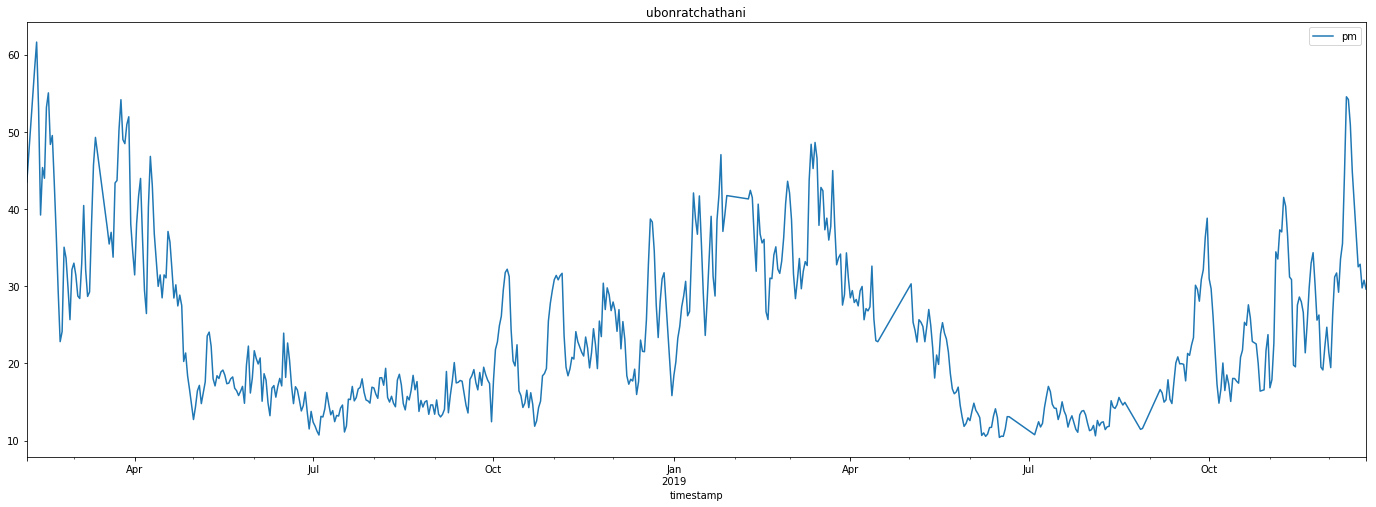

In [13]:
sensor_df.loc[demo_city_name].plot(
    x='timestamp', y='pm', figsize=(24, 8), title=demo_city_name)

# Standardize

In [16]:
pm = sensor_df['pm'].to_numpy().reshape((-1, 1))
sensor_df['pm'] = scaler.transform(pm)

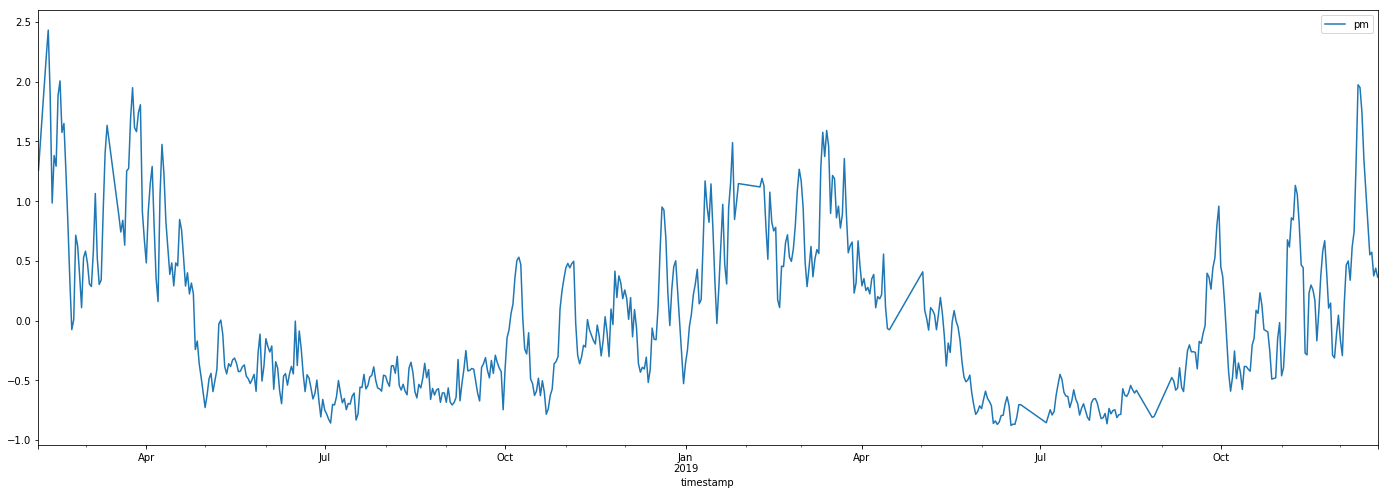

In [18]:
sensor_df.loc[demo_city_name].plot(x='timestamp', y='pm', figsize=(24, 8))

# Train & Test split

In [63]:
split_date = '2019-06-01'
train_sensor = sensor_df[sensor_df['timestamp'] < split_date]
test_sensor = sensor_df[sensor_df['timestamp'] >= split_date]

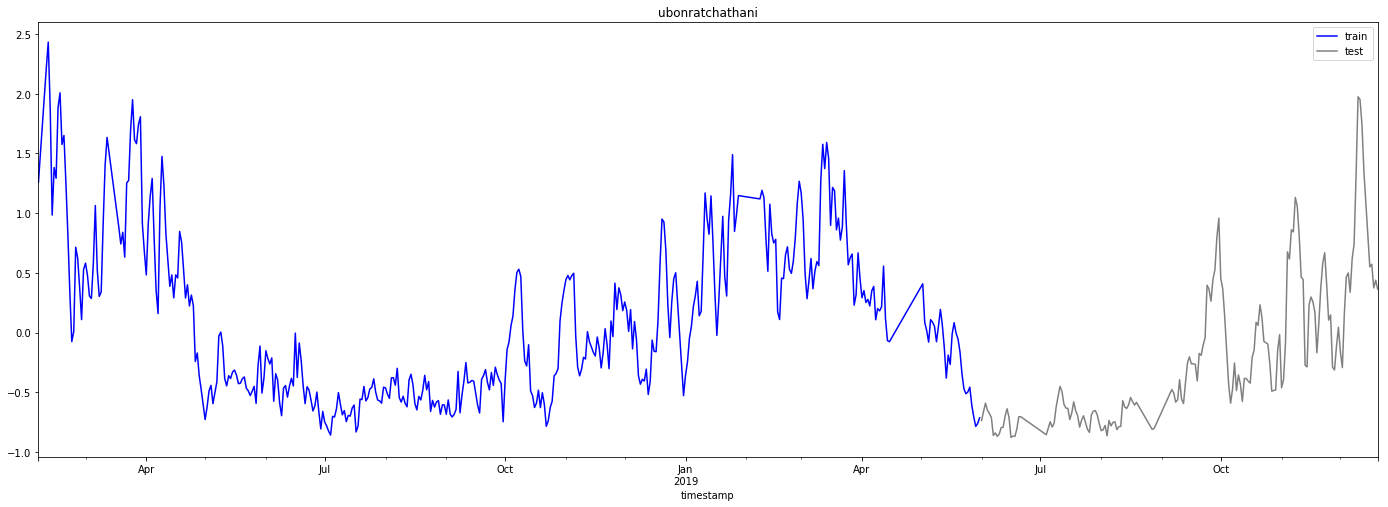

In [75]:
train_city = train_sensor.loc[demo_city_name]
test_city = test_sensor.loc[demo_city_name]

ax = train_city.plot(x='timestamp', y='pm', color='blue',
                     kind='line', label='train')
test_city.plot(x='timestamp', y='pm', color='grey', kind='line',
               title=demo_city_name, label='test', figsize=(24, 8), ax=ax)